In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
23820,Resort Hotel,0,29,2018,July,19,2,1,2,2,0.0,0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,95.00,0,1,Check-Out
14093,Resort Hotel,0,119,2017,October,32,7,0,2,2,0.0,0,Breakfast,NaN,Online TA,TA/TO,0,0,1,0,No Deposit,240.0,NaN,0,Personal,164.00,1,2,Check-Out
16603,Resort Hotel,0,51,2017,October,35,27,2,5,2,0.0,0,Full Board,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15.0,NaN,0,Personal,160.57,1,2,Check-Out
67248,City Hotel,1,132,2019,June,18,30,2,0,2,0.0,0,Breakfast,Kota Jakarta Barat,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,135.00,0,2,No-Show
17083,Resort Hotel,0,168,2017,November,38,18,2,5,2,0.0,0,Dinner,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,40.0,NaN,0,Contract,95.57,0,0,Check-Out


# Data Preprocessing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [19]:
cats = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
nums = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

In [20]:
df[nums].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [21]:
df[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


## Handle Missing Value

In [22]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [23]:
missing_value = df.isna().sum() *100/len(df)
print(round(missing_value, 3).sort_values(ascending=False))

company                           94.307
agent                             13.686
city                               0.409
children                           0.003
hotel                              0.000
is_repeated_guest                  0.000
total_of_special_requests          0.000
required_car_parking_spaces        0.000
adr                                0.000
customer_type                      0.000
days_in_waiting_list               0.000
deposit_type                       0.000
booking_changes                    0.000
previous_bookings_not_canceled     0.000
previous_cancellations             0.000
market_segment                     0.000
distribution_channel               0.000
is_canceled                        0.000
meal                               0.000
babies                             0.000
adults                             0.000
stays_in_weekdays_nights           0.000
stays_in_weekend_nights            0.000
arrival_date_day_of_month          0.000
arrival_date_wee

In [24]:
df = df.dropna(subset=['city', 'children'])

In [25]:
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

## Handle Duplicates

In [26]:
df.duplicated().sum()

33223

## Correcting Unsuitable Value

In [27]:
df['meal'].value_counts()

Breakfast     91863
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64

In [28]:
df = df.replace({'meal':{'Undefined':'No Meal'}})

In [29]:
df['meal'].value_counts()

Breakfast     91863
Dinner        14434
No Meal       11803
Full Board      798
Name: meal, dtype: int64

## Data Type Corection

In [30]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

## Drop Unnecessary Data

In [34]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))

# Pick the necessary data
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)]

print('before pre-processing:', df.shape[0])
print('after pre-processing:', df_clean.shape[0])

Data with 0 guest: 170 out of 118898 all data
Data with 0 night: 701 out of 118898 all data
before pre-processing: 118898
after pre-processing: 118088


In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118088 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118088 non-null  object 
 1   is_canceled                     118088 non-null  int64  
 2   lead_time                       118088 non-null  int64  
 3   arrival_date_year               118088 non-null  int64  
 4   arrival_date_month              118088 non-null  object 
 5   arrival_date_week_number        118088 non-null  int64  
 6   arrival_date_day_of_month       118088 non-null  int64  
 7   stays_in_weekend_nights         118088 non-null  int64  
 8   stays_in_weekdays_nights        118088 non-null  int64  
 9   adults                          118088 non-null  int64  
 10  children                        118088 non-null  int64  
 11  babies                          118088 non-null  int64  
 12  meal            

# Monthly Hotel Booking Analysis Based On Hotel Type

In [36]:
dfm = df_clean.copy()

In [37]:
dfm['arrival_date_year'].value_counts()

2018    55974
2019    40431
2017    21683
Name: arrival_date_year, dtype: int64

In [38]:
dfm['arrival_date_num_month'] = pd.to_datetime(dfm['arrival_date_month'], format='%B').dt.month

In [40]:
dfmh = dfm.groupby(['hotel', 'arrival_date_month', 'arrival_date_num_month', 'arrival_date_year']) \
        .agg({'hotel':'count'}) \
        .rename(columns={'hotel':'total_booking'}) \
        .reset_index()

dfmh.sort_values(['hotel', 'arrival_date_num_month', 'arrival_date_year'], inplace=True)
dfmh.drop('arrival_date_num_month', axis=1, inplace=True)
dfmh.set_index(['hotel', 'arrival_date_month', 'arrival_date_year'])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                        1224
                                2018                        3083
             February           2017                        1637
                                2018                        2460
             March              2018                        1355
                                2019                        2357
             April              2018                        2347
                                2019                        2570
             May                2018                        3028
                                2019                        3383
             June               2018                        3549
                                2019                        3909
             July               2018                        3640
                                2019                        4544
             August             2018                        3914
                                2019                        3960
             September          2017                        1393
                                2018                        3107
                                2019                        3554
             October            2017                        2467
                                2018                        3362
                                2019                        3119
             November           2017                        3516
                                2018                        3861
             December           2017                        3354
                                2018                        4186
Resort Hotel January            2017                        1069
                                2018                        1297
             February           2017                        1219
                                2018                        1326
             March              2018                         833
                                2019                        1271
             April              2018                        1477
                                2019                        1550
             May                2018                        1719
                                2019                        1532
             June               2018                        1824
                                2019                        1723
             July               2018                        1761
                                2019                        1747
             August             2018                        1333
                                2019                        1672
             September          2017                        1348
                                2018                        1407
                                2019                        1744
             October            2017                        1380
                                2018                        1663
                                2019                        1796
             November           2017                        1552
                                2018                        1507
             December           2017                        1524
                                2018                        1935

In [41]:
dfmhb = dfm.groupby(['hotel','arrival_date_month', 'arrival_date_num_month']) \
                  .agg({'arrival_date_year':['nunique','count']}) \
                  .reset_index()
dfmhb.columns = ['hotel_type','arrival_month', 'arrival_num_month', 'num_year', 'total_booking']
dfmhb['avg_booking'] = round(dfmhb['total_booking'] / dfmhb['num_year'])
dfmhb

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
0,City Hotel,April,4,2,4917,2458.0
1,City Hotel,August,8,2,7874,3937.0
2,City Hotel,December,12,2,7540,3770.0
3,City Hotel,February,2,2,4097,2048.0
4,City Hotel,January,1,2,4307,2154.0
5,City Hotel,July,7,2,8184,4092.0
6,City Hotel,June,6,2,7458,3729.0
7,City Hotel,March,3,2,3712,1856.0
8,City Hotel,May,5,2,6411,3206.0
9,City Hotel,November,11,2,7377,3688.0


In [42]:
dfmhb[dfmhb['num_year']==3]

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
10,City Hotel,October,10,3,8948,2983.0
11,City Hotel,September,9,3,8054,2685.0
22,Resort Hotel,October,10,3,4839,1613.0
23,Resort Hotel,September,9,3,4499,1500.0


In [43]:
dfmhb.sort_values(['hotel_type', 'arrival_num_month'], inplace=True)
sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
dfmhb['arrival_month'] = pd.Categorical(dfmhb['arrival_month'], 
                                          categories=sorter, 
                                          ordered=True)
dfmhb.reset_index(drop=True, inplace=True)
dfmhb

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
0,City Hotel,January,1,2,4307,2154.0
1,City Hotel,February,2,2,4097,2048.0
2,City Hotel,March,3,2,3712,1856.0
3,City Hotel,April,4,2,4917,2458.0
4,City Hotel,May,5,2,6411,3206.0
5,City Hotel,June,6,2,7458,3729.0
6,City Hotel,July,7,2,8184,4092.0
7,City Hotel,August,8,2,7874,3937.0
8,City Hotel,September,9,3,8054,2685.0
9,City Hotel,October,10,3,8948,2983.0


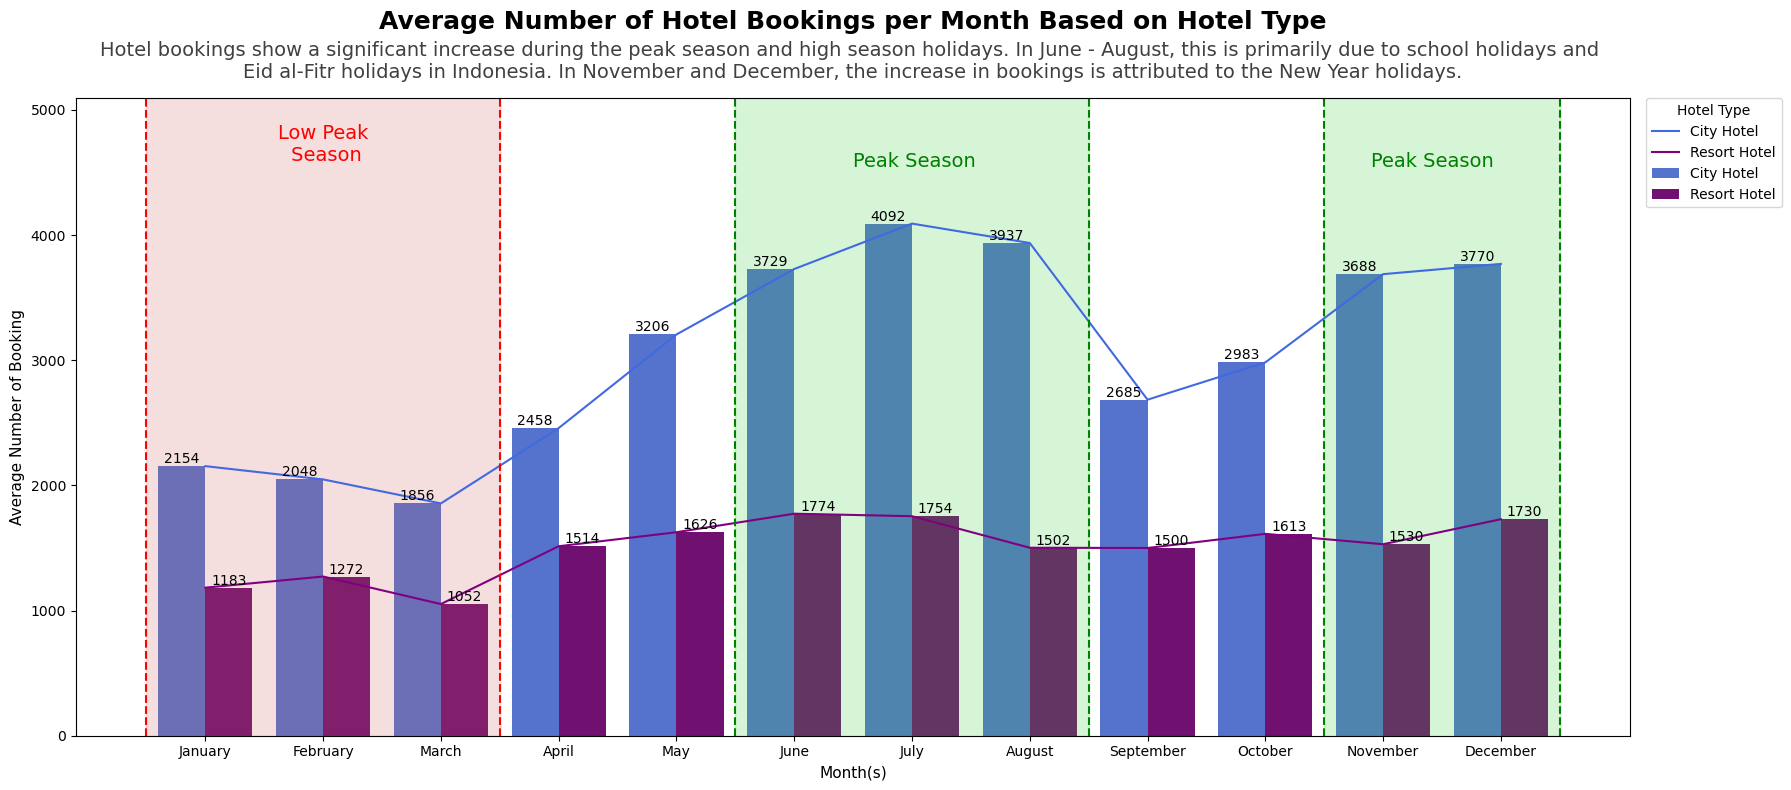

In [76]:
fig, ax = plt.subplots(figsize=(18, 8))
color = ['royalblue', 'purple']
plt.ylim(0, max_book+1000)
plt.tight_layout()

sns.barplot(x='arrival_month', y ='avg_booking', 
            data=dfmhb, hue='hotel_type', palette=color)

sns.lineplot(x='arrival_month', y ='avg_booking', 
            data=dfmhb, hue='hotel_type', palette=color)

plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
    
max_book = max(dfmhb['avg_booking'])

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,3.5), max_book+1000, color='indianred', alpha=0.2)
plt.text(x=1, y=max_book+500, s='Low Peak\n Season', fontsize=14, color='red', ha='center')

plt.axvline(4.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,8.5), max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=5.5, y=max_book+500, s='Peak Season', fontsize=14, color='green', va='center')

plt.axvline(9.5, ls='--', color='green')
plt.axvline(11.5, ls='--', color='green')
plt.stackplot(np.arange(9.5,12.5), max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=9.9, y=max_book+500, s='Peak Season', fontsize=14, color='green', va='center')

plt.title("Average Number of Hotel Bookings per Month Based on Hotel Type", 
          fontsize=18, color='black', weight='bold', pad=50)
plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.legend(title="Hotel Type",
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           borderaxespad=0)

x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = '''Hotel bookings show a significant increase during the peak season and high season holidays. In June - August, this is primarily due to school holidays and 
Eid al-Fitr holidays in Indonesia. In November and December, the increase in bookings is attributed to the New Year holidays.'''

ax.text((x_start+x_end)/2, y_end*0.95, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)

# Impact Analysis Of Stay Duration On Hotel Bookings

In [78]:
df1 = dfm.copy()

In [79]:
df1['stay_duration'].value_counts()

2     27518
3     27013
1     20781
4     17353
7      8626
5      7752
6      3839
8      1151
10     1131
14      910
9       837
11      392
12      220
13      139
21       71
15       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
29       13
30       13
22       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
45        1
38        1
46        1
48        1
34        1
Name: stay_duration, dtype: int64

In [80]:
def set_staydur_group(x):
    if x['stay_duration'] <= 7:
        return '<= 1 Week'
    elif x['stay_duration'] <= 14:
        return '2 Weeks'
    elif x['stay_duration'] <= 21:
        return '3 Weeks'
    return '>= 4 Weeks'

df1['stay_duration_group'] = df1.apply(lambda x: set_staydur_group(x), axis = 1)
df1['stay_duration_group'].unique()

array(['<= 1 Week', '3 Weeks', '2 Weeks', '>= 4 Weeks'], dtype=object)

In [81]:
df1['stay_duration_group'].value_counts()

<= 1 Week     112882
2 Weeks         4780
3 Weeks          273
>= 4 Weeks       153
Name: stay_duration_group, dtype: int64

In [82]:
dfc = df1.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
dfc.rename(columns={'agent':'num_booking'}, inplace=True)

df_sum = dfc.groupby(['hotel', 'stay_duration_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
dfc = dfc.merge(df_sum, on=['hotel', 'stay_duration_group'])

dfc['cancellation_rate'] = round((dfc['num_booking']/dfc['sum_booking'])*100, 2)
dfc

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,2 Weeks,0,511,1069,47.80
1,City Hotel,2 Weeks,1,558,1069,52.20
2,City Hotel,3 Weeks,0,29,105,27.62
3,City Hotel,3 Weeks,1,76,105,72.38
4,City Hotel,<= 1 Week,0,45285,77658,58.31
5,City Hotel,<= 1 Week,1,32373,77658,41.69
6,City Hotel,>= 4 Weeks,0,6,47,12.77
7,City Hotel,>= 4 Weeks,1,41,47,87.23
8,Resort Hotel,2 Weeks,0,2634,3711,70.98
9,Resort Hotel,2 Weeks,1,1077,3711,29.02


In [83]:
dfct = dfc[dfc['is_canceled']==1].sort_values('stay_duration_group', ascending=True)
dfct

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,2 Weeks,1,558,1069,52.20
9,Resort Hotel,2 Weeks,1,1077,3711,29.02
3,City Hotel,3 Weeks,1,76,105,72.38
11,Resort Hotel,3 Weeks,1,79,168,47.02
5,City Hotel,<= 1 Week,1,32373,77658,41.69
13,Resort Hotel,<= 1 Week,1,9865,35224,28.01
7,City Hotel,>= 4 Weeks,1,41,47,87.23
15,Resort Hotel,>= 4 Weeks,1,46,106,43.40


In [84]:
dfct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 15
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel                8 non-null      object 
 1   stay_duration_group  8 non-null      object 
 2   is_canceled          8 non-null      int64  
 3   num_booking          8 non-null      int64  
 4   sum_booking          8 non-null      int64  
 5   cancellation_rate    8 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 448.0+ bytes


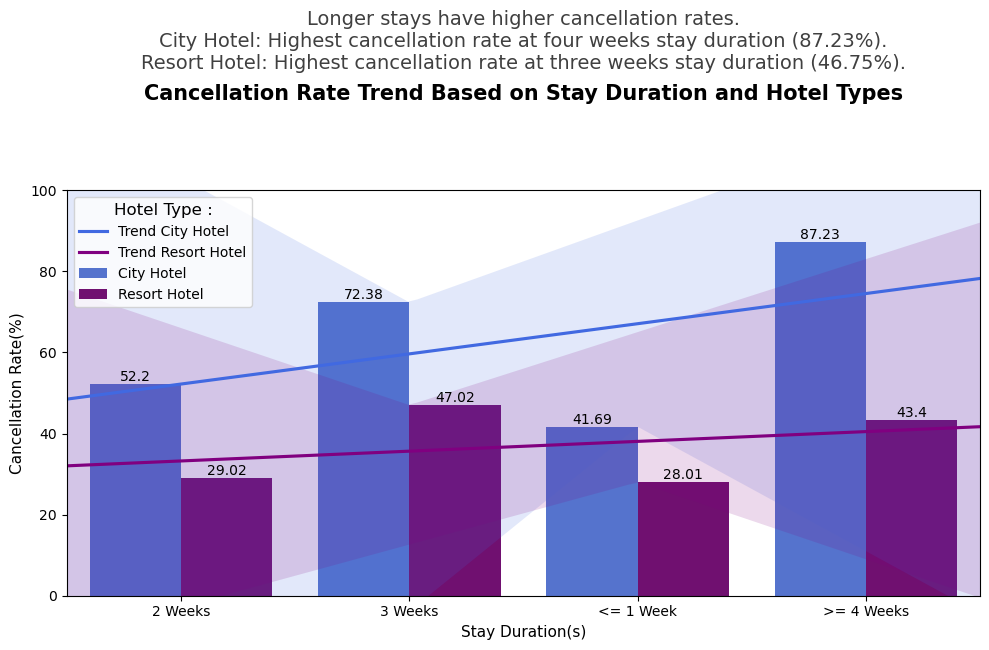

In [88]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.ylim(0, 100)
plt.tight_layout()

color = ['royalblue', 'purple']
city_hotel = dfct[dfct['hotel'] == 'City Hotel']
resort_hotel = dfct[dfct['hotel'] == 'Resort Hotel']

sns.barplot(x='stay_duration_group', y='cancellation_rate', 
            data=dfct, hue='hotel', palette=color)

sns.regplot(x=np.arange(0, len(city_hotel)), y='cancellation_rate', 
            data=city_hotel, scatter=False, color=color[0],
            label = 'Trend City Hotel', truncate=False)

sns.regplot(x=np.arange(0, len(resort_hotel)), y='cancellation_rate', 
            data=resort_hotel, scatter=False, color=color[1], 
            label='Trend Resort Hotel', truncate=False)

plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

plt.title('Cancellation Rate Trend Based on Stay Duration and Hotel Types', 
          fontsize=15, color='black', weight='bold', pad=65)
plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})

x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = '''Longer stays have higher cancellation rates.
City Hotel: Highest cancellation rate at four weeks stay duration (87.23%).
Resort Hotel: Highest cancellation rate at three weeks stay duration (46.75%).'''
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center', fontsize = 14,  alpha = 0.75)

# Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rate

In [89]:
dfi = df_clean.copy()

In [90]:
dfi['lead_time'].value_counts()

0      5898
1      3320
2      2007
3      1790
4      1678
       ... 
389       1
387       1
400       1
370       1
463       1
Name: lead_time, Length: 478, dtype: int64

In [91]:
lead_time_group=[]
for i in dfi['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_group.append(lead_group)
dfi['lead_time_group'] = lead_time_group

In [92]:
dfi['lead_time_group'].value_counts()

2-4 Months      39804
1 Month         37716
5-7 Months      21586
8-10 Months     11103
>12 Months       4465
11-12 Months     3414
Name: lead_time_group, dtype: int64

In [93]:
dfia = dfi.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
dfia.rename(columns={'agent':'num_booking'}, inplace=True)

#create sum booking column
df_sum = dfia.groupby(['hotel', 'lead_time_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'total_booking'}, inplace=True)
dfia = dfia.merge(df_sum, on=['hotel', 'lead_time_group'])

#create cancellation rate
dfia['cancellation_rate'] = round((dfia['num_booking']/dfia['total_booking'])*100, 2)
dfia

,hotel,lead_time_group,is_canceled,num_booking,total_booking,cancellation_rate
0,City Hotel,1 Month,0,17846,23016,77.54
1,City Hotel,1 Month,1,5170,23016,22.46
2,City Hotel,11-12 Months,0,566,2506,22.59
3,City Hotel,11-12 Months,1,1940,2506,77.41
4,City Hotel,2-4 Months,0,16406,28189,58.20
5,City Hotel,2-4 Months,1,11783,28189,41.80
6,City Hotel,5-7 Months,0,7298,14335,50.91
7,City Hotel,5-7 Months,1,7037,14335,49.09
8,City Hotel,8-10 Months,0,2760,7136,38.68
9,City Hotel,8-10 Months,1,4376,7136,61.32


In [94]:
df4 = dfia[dfia['is_canceled']==1]
df4

,hotel,lead_time_group,is_canceled,num_booking,total_booking,cancellation_rate
1,City Hotel,1 Month,1,5170,23016,22.46
3,City Hotel,11-12 Months,1,1940,2506,77.41
5,City Hotel,2-4 Months,1,11783,28189,41.80
7,City Hotel,5-7 Months,1,7037,14335,49.09
9,City Hotel,8-10 Months,1,4376,7136,61.32
11,City Hotel,>12 Months,1,2742,3697,74.17
13,Resort Hotel,1 Month,1,1956,14700,13.31
15,Resort Hotel,11-12 Months,1,395,908,43.50
17,Resort Hotel,2-4 Months,1,3990,11615,34.35
19,Resort Hotel,5-7 Months,1,2684,7251,37.02


In [95]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel              12 non-null     object 
 1   lead_time_group    12 non-null     object 
 2   is_canceled        12 non-null     int64  
 3   num_booking        12 non-null     int64  
 4   total_booking      12 non-null     int64  
 5   cancellation_rate  12 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 672.0+ bytes


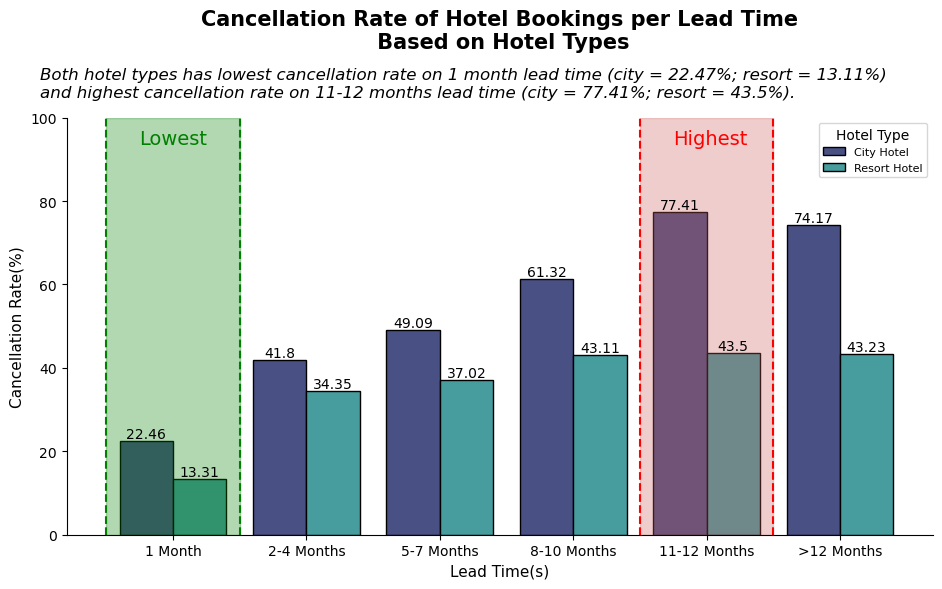

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Cancellation Rate of Hotel Bookings per Lead Time\n Based on Hotel Types", fontsize=15, color='black', weight='bold', pad=50)
plt.text(x=-1, y=105, s="Both hotel types has lowest cancellation rate on 1 month lead time (city = 22.47%; resort = 13.11%)\nand highest cancellation rate on 11-12 months lead time (city = 77.41%; resort = 43.5%).", fontsize=12, fontstyle='italic')
sns.barplot(x='lead_time_group', y='cancellation_rate', data=df4, hue='hotel', order=['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months'], edgecolor='black', palette='mako')

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), [[100]], color='indianred', alpha=0.3)
plt.text(x=3.75, y=95, s='Highest', fontsize=14, color='red', va='center')

plt.axvline(0.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='green', alpha=0.3)
plt.text(x=-0.25, y=95, s='Lowest', fontsize=14, color='green', va='center')

plt.legend(title='Hotel Type', prop={'size':8}, loc=1)

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_leadtime.png', dpi=200)